# State-of-the-Art overview: Modulation mechanisms for dynamic holography

```{note}
This chapter is reproduced with permission from Section 2.3.2 of the PhD of Guillaume Croes.
```

In this section we compare the results obtained in the Video Holography ERC project with the state-of-the-art for dynamic holograms.
The results reported in the different subsections can be summarized in {numref}`SotA`.
The most relevant metrics are the hologram pixel resolution and the refresh rate.
The target for the hologram pixel resolution is defined by the 180 degree blue diffraction angle.
The target for the refresh rate is 360 Hz, as this allows to swap sufficiently fast the RGB colours of the 3 lasers without causing artifacts that are can be noticed.

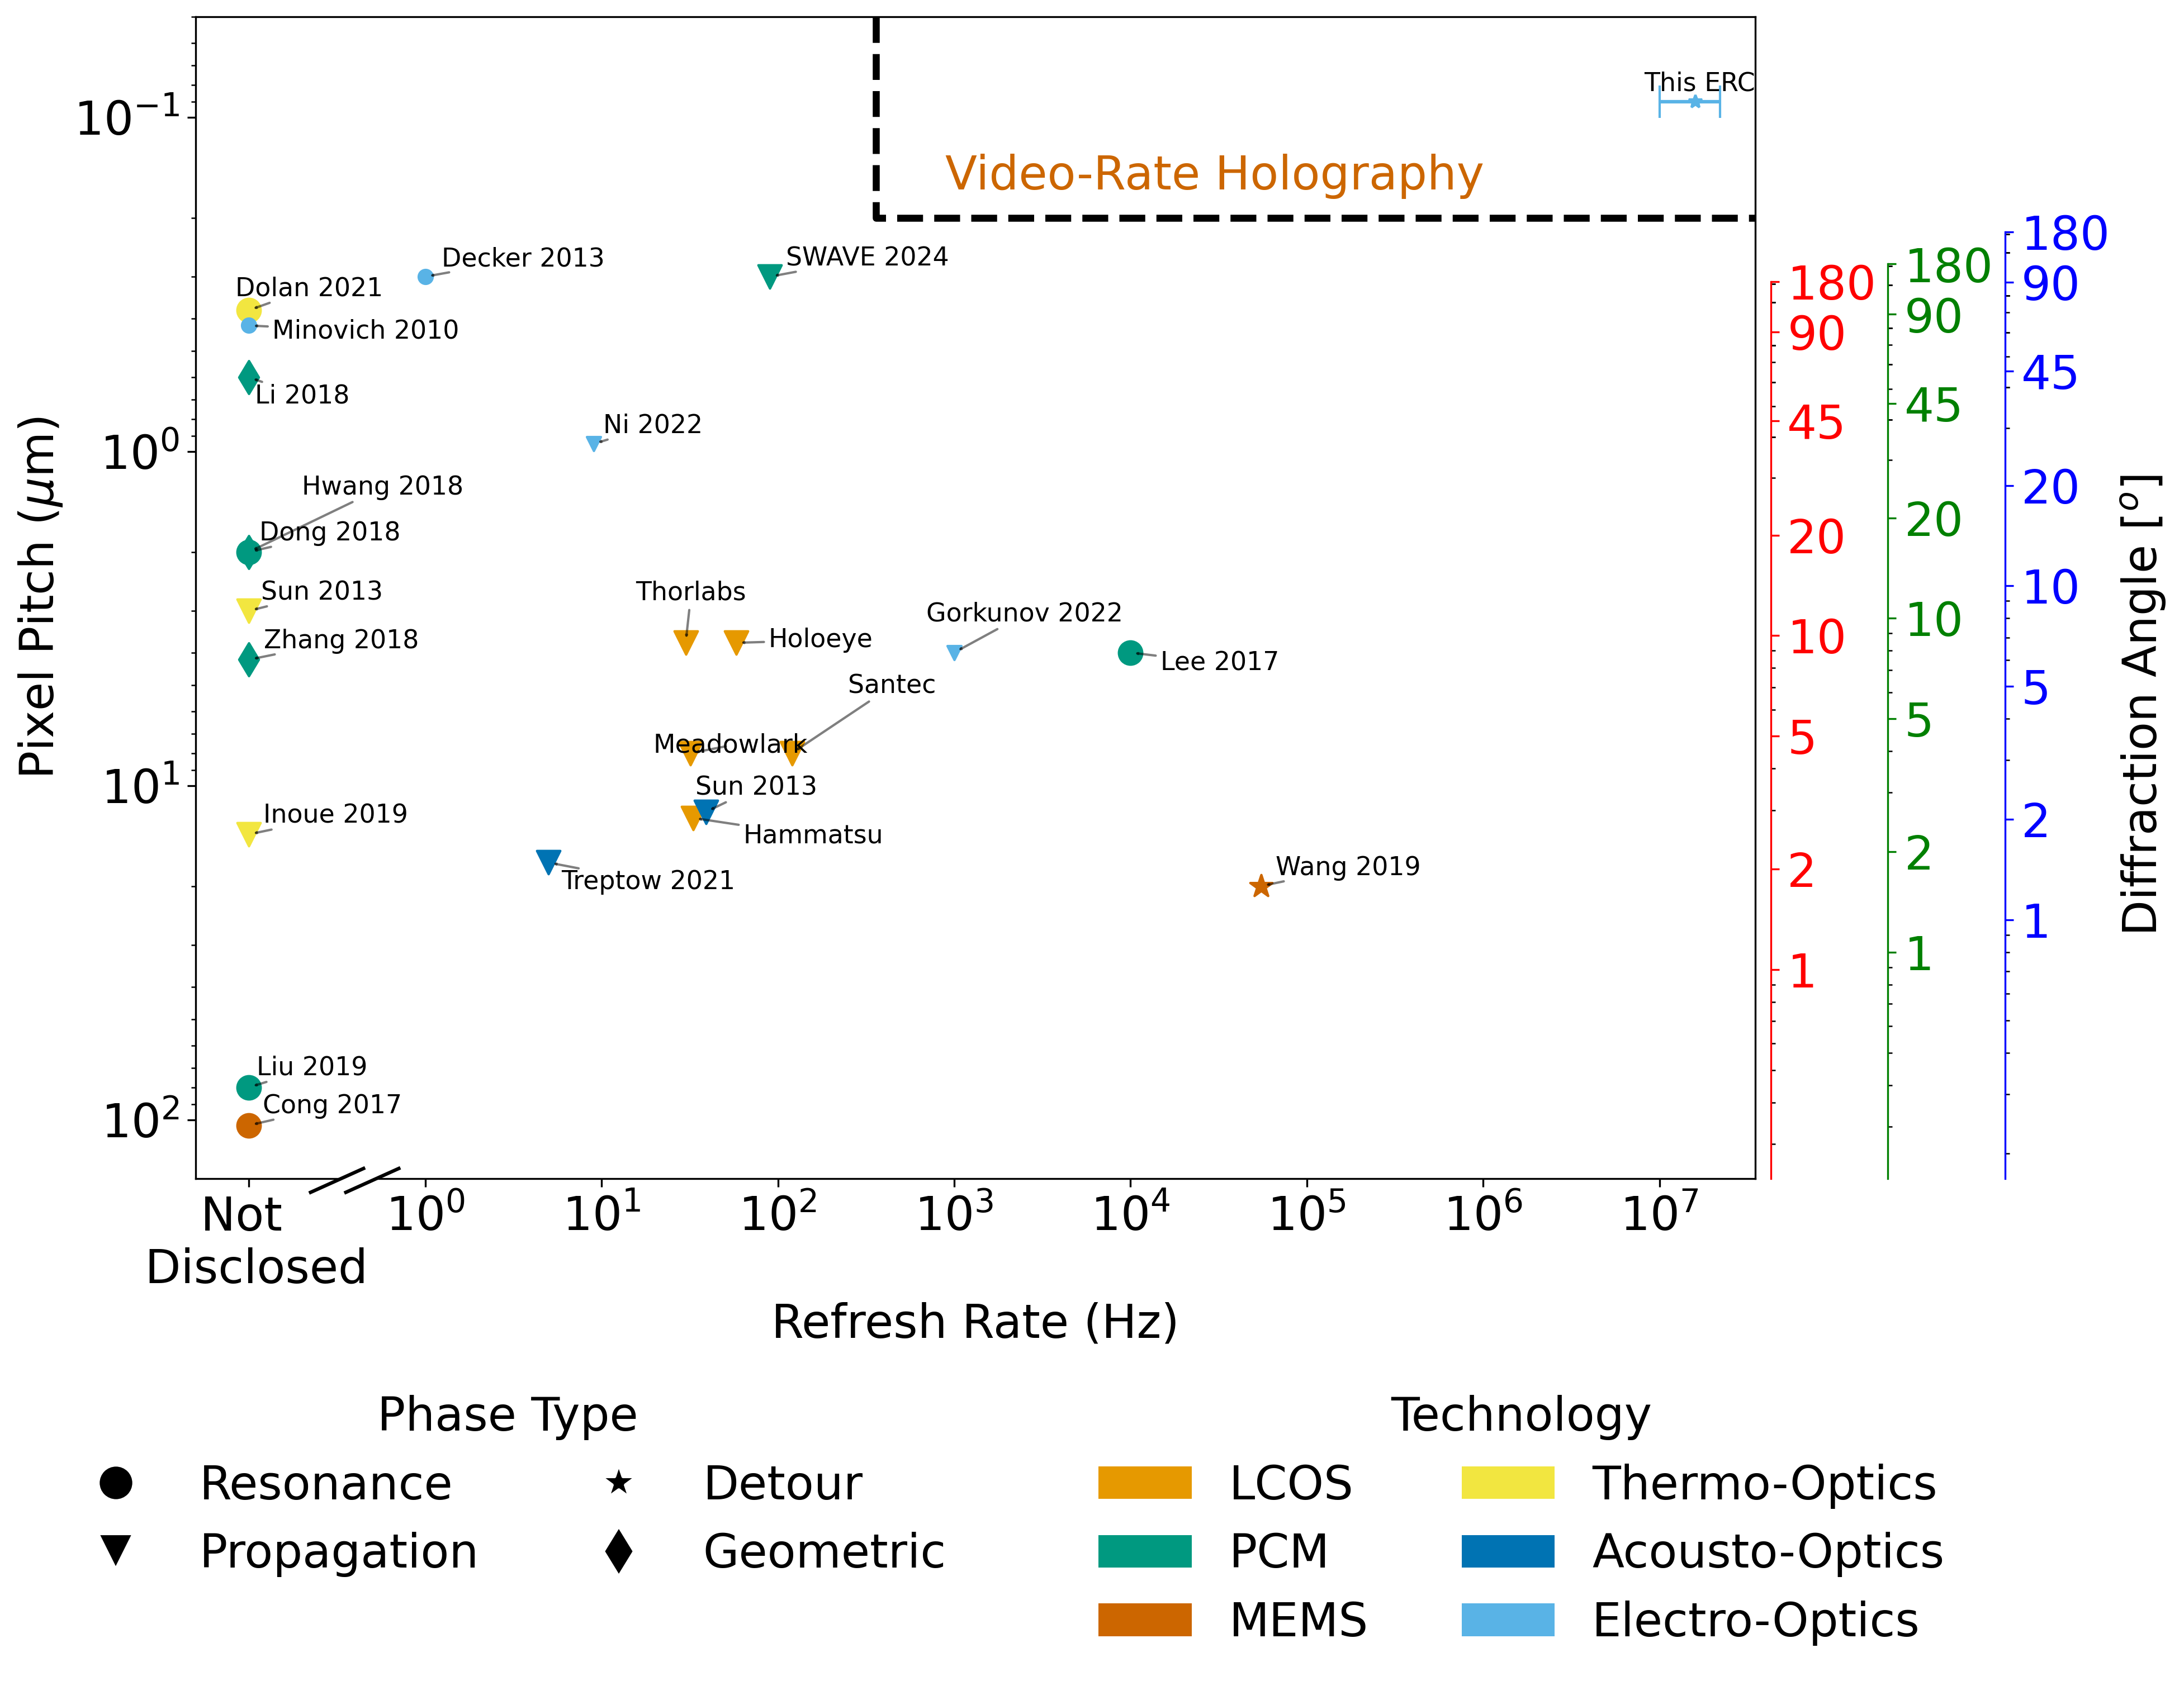

In [25]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import numpy as np
from matplotlib.lines import Line2D 
from matplotlib.ticker import LogLocator

plt.rcParams['font.size'] = 20
Colorblind=((0.9,0.6,0),(0.35,0.7,0.9),(0,0.6,0.5),(0.95,0.9,0.25),(0,0.45,0.7),(0.8,0.4,0),(0.8,0.6,0.7),(0,0,0),(0.9,0.6,0),(0.35,0.7,0.9),(0,0.6,0.5),(0.95,0.9,0.25),(0,0.45,0.7),(0.8,0.4,0),(0.8,0.6,0.7),(0,0,0))

# Liquid Crystal Technologies - LCOS
# bibtech ref 
RefreshRateLCOS = [33, 58, 120, 30, 32]
PixelPitchLCOS = [12.5, 3.74, 8, 3.74, 8]
NameDateLCOS = ["Hammatsu", "Holoeye", "Santec", "Thorlabs", "Meadowlark"]
TypeLCOS = ["Propagation", "Propagation", "Propagation", "Propagation", "Propagation"]

# Phase Change Materials
# bibtech ref 
RefreshRatePCM = [0.1, 0.1, 9950, 0.1, 0.1, 0.1, 90]
PixelPitchPCM = [0.6, 4.2, 4, 2, 80, 2, 0.3]
NameDatePCM = ["Li 2018", "Zhang 2018", "Lee 2017", "Dong 2018", "Liu 2019", "Hwang 2018", "SWAVE 2024"]
TypePCM = ["Geometric", "Geometric", "Resonance", "Geometric", "Resonance", "Resonance", "Propagation"]

# Thermo Optics
# bibtech ref 
RefreshRateTO = [0.1, 0.1, 0.1]
PixelPitchTO = [3, 14, 0.378]
NameDateTO = ["Sun 2013", "Inoue 2019", "Dolan 2021"]
TypeTO = ["Propagation", "Propagation", "Resonance"]

# Acousto Optics
# bibtech ref 
RefreshRateAO = [39, 5]
PixelPitchAO = [12, 17]
NameDateAO = ["Sun 2013", "Treptow 2021"]
TypeAO = ["Propagation", "Propagation"]

# Electro-Optics
# bibtech ref Decker2013Electro-opticalMetasurfaces, 
RefreshRateEO = [1, 1000, 0.1, 9]
PixelPitchEO = [0.3, 4, 0.42, 0.950]
NameDateEO = ["Decker 2013", "Gorkunov 2022", "Minovich 2010", "Ni 2022"]
TypeEO = ["Resonance", "Propagation", "Resonance", "Propagation"]

# MEMS
# bibtech ref 
RefreshRateMEMS = [0.1, 55000]
PixelPitchMEMS = [104, 20]
NameDateMEMS = ["Cong 2017", "Wang 2019"]
TypeMEMS = ["Resonance", "Detour"]

def find_marker(list_item):
    if list_item == "Resonance":
        mark = "o"
    elif list_item == "Propagation":
        mark = "v"
    elif list_item == "Huygens":
        mark = "s"
    elif list_item == "Geometric":
        mark = "d"
    elif list_item == "Nonlinear":
        mark = "^"
    elif list_item == "Detour":
        mark = "*"
    return mark

def pitch2x(x,wlx):
    x2=x.copy()
    x2[x2<wlx/2]=wlx/2
    return 2*180*np.arcsin(wlx/2/x2)/np.pi
 
def x2pitch(x,wlx):
    x2=x.copy()
    x2[x2<1e-4]=1e-4
    return wlx/2/np.sin(np.pi*x2/360 )
    
wlred,wlgreen,wlblue=0.620,0.550,0.440

def pitch2red2(x):
    return 2*180*np.arcsin(0.62/2/x)/np.pi

def pitch2red(x):
    return pitch2x(x,wlred)
def red2pitch(x):
    return x2pitch(x,wlred)
def pitch2green(x):
    return pitch2x(x,wlgreen)
def green2pitch(x):
    return x2pitch(x,wlgreen)
def pitch2blue(x):
    return pitch2x(x,wlblue)
def blue2pitch(x):
    return x2pitch(x,wlblue)

def log_to_linear(y):
    return np.log10(y)

def linear_to_log(y):
    return 10**y

fig, ax = plt.subplots(1, 1, figsize=(12,9), dpi=300)
fig.subplots_adjust(wspace=0.05)

ax.invert_yaxis()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Refresh Rate (Hz)')
ax.set_ylabel(r'Pixel Pitch ($\mu$m)')
ax.set_xlim(0.05, 35000000)
ax.set_ylim(150, 0.05)

#ax.add_patch(Rectangle((100, 0.1), 100000, 0.15, facecolor = Colorblind[0], alpha=0.5, fill=True, lw=3))
#ax.add_patch(Rectangle((100, 0.1), 100000, 0.15,edgecolor = Colorblind[5] , fill=False, lw=1))
x2, y2 = np.array([[360, 360, 35000000], [0.05,0.2, 0.2]])
line2 = mlines.Line2D(x2, y2, lw=3., linestyle='--', color = 'black', zorder = 1)
ax.add_line(line2)

ax.text(30000, 0.15, 'Video-Rate Holography', fontsize=20, color=Colorblind[5],va='center',ha='center',rotation='horizontal')
texts = []

for i, txt in enumerate(NameDateLCOS):
    ax.scatter(RefreshRateLCOS[i], PixelPitchLCOS[i],  color=Colorblind[0],s=100, marker = find_marker(TypeLCOS[i]))
    texts.append(plt.text(RefreshRateLCOS[i], PixelPitchLCOS[i], txt, size=11))

for i, txt in enumerate(NameDatePCM):
    ax.scatter(RefreshRatePCM[i], PixelPitchPCM[i],  color=Colorblind[2],s=100, marker = find_marker(TypePCM[i]))
    texts.append(plt.text(RefreshRatePCM[i], PixelPitchPCM[i], txt, size=11))

for i, txt in enumerate(NameDateTO):
    ax.scatter(RefreshRateTO[i], PixelPitchTO[i],  color=Colorblind[3],s=100, marker = find_marker(TypeTO[i]))
    texts.append(plt.text(RefreshRateTO[i], PixelPitchTO[i], txt, size=11))

for i, txt in enumerate(NameDateAO):
    ax.scatter(RefreshRateAO[i], PixelPitchAO[i],  color=Colorblind[4],s=100, marker = find_marker(TypeAO[i]))
    texts.append(plt.text(RefreshRateAO[i], PixelPitchAO[i], txt, size=11))

for i, txt in enumerate(NameDateMEMS):
    ax.scatter(RefreshRateMEMS[i], PixelPitchMEMS[i],  color=Colorblind[5],s=100, marker = find_marker(TypeMEMS[i]))
    texts.append(plt.text(RefreshRateMEMS[i], PixelPitchMEMS[i], txt, size=11))

for i, txt in enumerate(NameDateEO):
    ax.scatter(RefreshRateEO[i], PixelPitchEO[i],  color=Colorblind[1], marker = find_marker(TypeEO[i]))
    texts.append(plt.text(RefreshRateEO[i], PixelPitchEO[i], txt, size=11))
    
ERC_freq = 16000000
ERC_pitch = 0.09  # 90 nm
ERC_freq_error = 6000000
ax.errorbar(ERC_freq, ERC_pitch, xerr = ERC_freq_error, color=Colorblind[1], capsize=7, marker = find_marker("Detour"))
texts.append(plt.text(ERC_freq, ERC_pitch, "This ERC", size=11))

legend_elements = [Patch(facecolor=Colorblind[0], label='LCOS'),Patch(facecolor=Colorblind[2], label='PCM'),Patch(facecolor=Colorblind[5], label='MEMS'),Patch(facecolor=Colorblind[3], label='Thermo-Optics'),Patch(facecolor=Colorblind[4], label='Acousto-Optics'),Patch(facecolor=Colorblind[1], label='Electro-Optics')]


legend_elements2 = [Line2D([0], [0], marker='o', color='w', label='Resonance', markerfacecolor='k', markersize=15), Line2D([0], [0], marker='v', color='w', label='Propagation', markerfacecolor='k', markersize=15), Line2D([0], [0], marker='*', color='w', label='Detour', markerfacecolor='k', markersize=15), Line2D([0], [0], marker='d', color='w', label='Geometric', markerfacecolor='k', markersize=15)]

legend2 = ax.legend(handles=legend_elements2, loc='upper center', bbox_to_anchor=(0.2, -0.15), ncol=2, title='Phase Type', frameon=False)
legend1 = ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.85, -0.15), ncol=2, title='Technology', frameon=False)

ax.add_artist(legend2)

#axis adjusted
ax.set_xticks([0.1, 1, 10 , 10**2 , 10**3 , 10**4 , 10**5 , 10**6 , 10**7])
ax.set_xticklabels(['Not \n Disclosed', '$10^0$', '$10^1$' , '$10^2$' , '$10^3$' , '$10^4$' , '$10^5$' , '$10^6$' , '$10^7$'])

line = Line2D([10**-0.15, 10**-0.45], [140, 165], color = 'black', zorder=3)
line2 = Line2D([10**-0.35, 10**-0.65], [140, 165], color = 'black', zorder=3)
line3 = Line2D([10**-0.25, 10**-0.55], [140, 165], color = 'white', linewidth = 5, zorder=3)

line.set_clip_on(False)
line2.set_clip_on(False)
line3.set_clip_on(False)

ax.add_line(line3)
ax.add_line(line)
ax.add_line(line2)

ax.xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))

# Turn off minor ticks for the first half of the x-axis
for tick in ax.xaxis.get_minor_ticks():
    if tick.tick1line.get_xdata()[0] < 2:  # Adjust the condition as needed
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)

def axis_to_fig(axis):
    fig = axis.figure
    def transform(coord):
        return fig.transFigure.inverted().transform(
            axis.transAxes.transform(coord))
    return transform

def add_sub_axes(axis, rect):
    fig = axis.figure
    left, bottom, width, height = rect
    trans = axis_to_fig(axis)
    figleft, figbottom = trans((left, bottom))
    figwidth, figheight = trans([width,height]) - trans([0,0])
    return fig.add_axes([figleft, figbottom, figwidth, figheight])

# find min max of new axis
log_min =  np.log10(150)
log_max =  np.log10(0.05)
def log_percent(wvl):
    log_per =  np.log10(wvl/2)
    total = log_min - log_max
    total_per = log_min - log_per
    return total_per/total

axes_red = add_sub_axes(ax, [0, 0, 1, log_percent(0.62)])
axes_red.set_xticks([])
axes_red.set_xticks([], minor=True)
axes_red.set_yticks([])
axes_red.set_yticks([], minor=True)
axes_red.set_ylim(150, 0.31)
axes_red.set_yscale('log')
axes_red.patch.set_alpha(0)
axes_red.axis('off')

axes_green = add_sub_axes(ax, [0, 0, 1, log_percent(0.55)])
axes_green.set_xticks([])
axes_green.set_xticks([], minor=True)
axes_green.set_yticks([])
axes_green.set_yticks([], minor=True)
axes_green.set_ylim(150, 0.55/2)
axes_green.set_yscale('log')
axes_green.patch.set_alpha(0)
axes_green.axis('off')

axes_blue = add_sub_axes(ax, [0, 0, 1, log_percent(0.44)])
axes_blue.set_xticks([])
axes_blue.set_xticks([], minor=True)
axes_blue.set_yticks([])
axes_blue.set_yticks([], minor=True)
axes_blue.set_ylim(150, 0.44/2)
axes_blue.set_yscale('log')
axes_blue.patch.set_alpha(0)
axes_blue.axis('off')

secax_y1 = axes_red.secondary_yaxis(1.01, functions=(pitch2red, red2pitch), color='red',ybound=(1,180),yticks=[1, 2,5,10,20,45,90,180])
secax_y2 = axes_green.secondary_yaxis(1.085, functions=(pitch2green, green2pitch), color='green',ybound=(1,180),yticks=[1, 2,5,10,20,45,90,180])
secax_y3 = axes_blue.secondary_yaxis(1.16, functions=(pitch2blue, blue2pitch),color='blue',ybound=(1,180),yticks=[1, 2,5,10,20,45,90,180])
for aaxx in [secax_y1, secax_y2,secax_y3]:
    #print(aaxx.get_yticks())
    aaxx.set_yticks([1, 2,5,10,20,45,90,180])  # Adjust the tick values as needed
    aaxx.set_yticklabels(['1', '2','5','10','20','45','90','180'])
    #print(aaxx.get_yticks())
secax_y3.set_ylabel(r'Diffraction Angle $[^o]$', color='black');

adjust_text(texts, force_text=(1.2,2.4),expand=(1.2,1.5),arrowprops=dict(arrowstyle="->", color='k', alpha=.5),ax=ax);

## Doped Lithium Niobate

Various doped Lithium Niobate (LN) crystals show a photorefractive effect, i.e. when locally exposed to light, they change in refractive index.{cite}`Chen1969OpticallyLiTaO3` Originally, this effect was thought to be optical damage to the LN, but Iron impurities were quickly found to be the root cause.{cite}`Ashkin1966Optically-inducedLiTaO3, Chen1968HolographicNiobate` Afterwards, a wide range of dopants were employed, each offering different results in spectral response and writability.{cite}`McMillen1998HolographicCrystals`

The effect originates due to redistribution of charges, which causes electric fields to form inside the crystal. Said fields, through the Pockels effect change the refractive index. Homogeneous illumination can be used to probe the modulated refractive index but has a tendency to erase the stored data depending on intensity and wavelength. Similarly, the stored data can be reset by a thermal anneal. More advanced crystals employ two separate dopants to create a photochromic behaviour in which the absorption changes when illuminated with a certain wavelength. One notable example is the combined use of Iron and Manganese, which form shallow and deep traps respectively.{cite}`Buse1998Non-volatileCrystals` Here, the shallow traps initially tend to be empty and can become populated after the deep traps are excited by ultraviolet (UV) light. The crystal then gains an absorption shoulder at longer wavelengths corresponding to the population of the shallow traps. This proofs useful for nonvolatile holographic storage as recordings can be made using a combination of short and long wavelengths, after which reading can be done using just the long wavelength for which the deep traps do not respond. This re-writability made this set of materials very interesting for holographic storage.{cite}`Mok1993Angle-multiplexedNiobate` Unfortunately, the write-rewrite speed remains too low for any practical holographic display.

## Liquid Crystals

Liquid crystals (LC) form a special phase of matter situated between crystalline and liquid phases. They form a collection of long molecules, often polymers, that can have a permanent electric dipole with a positive and negative charge on either side of the molecule. This enables them to be reoriented under influence of electric and magnetic fields. They are most known from their use in liquid crystal displays (LCD), which was one of the earliest flat panel displays. In the context of beam shaping and holography, they are mostly used in liquid crystal on silicon (LCOS) phase modulators. This is a rather mature platform, for which many commercial versions are available. That said, they are now also being considered as active component in metamaterials.

LCOS modulators were first introduced in the 1970's by the Hughes aircraft company.{cite}`Ernstoff1973LiquidDisplay` These initial devices employed an electric current instead of the now commonly used electric field, as driving force. Consequently, they weren't suitable for phase modulation. That said, the prospect of a silicon backplane combined with the tunability of liquid crystals remained promising. Further research lead to more practical implementations capable of phase modulation around the early 1990's.{cite}`Collings1989EvolutionaryModulators, Johnson1993SmartSilicon` From then onward, the technology gradually found its footing in industry but always stayed in the shadow of the much better known LCDs. LCOS was quickly used for beam steering applications and eventually for holography as well.{cite}`Resler1996High-efficiencySteering, Reichelt2012Full-rangeHolography` For a good overview on the types of LCOS, their applications and an industry perspective, the reader is referred to {cite}`Vettese2010LiquidSilicon, Zhang2014FundamentalsDevices`. {numref}`SotA` contains several state of the art LCOS modulators that are currently commercially available.

```{figure} ./images/image2_11.PNG
:width: 100%
:alt: Liquid Crystals
:name: chapter2:image11

a) Schematic of a tunable liquid crystal metamaterial. The metamaterial is patterned on the bottom electrode, whereas a brushed PVA layer ensures liquid crystal alignement at the top electrode. b) - c) Transmission behaviour for various wavelengths and bias of the LC cell shown in a). Supplying sufficient bias switches the transmission. The insets show the orientation of the liquid crystals. d) Photograph of holographic reconstruction projected by a LC spatial light modulator (SLM). e) Schematic of a LC cell employing electrodes to create tunable gratings. f) Outcoupling intensity for a grating with $6\mu m$ period as shown in e). Images adapted from {cite}`Decker2013Electro-opticalMetasurfaces, Reichelt2012Full-rangeHolography, Gorkunov2022Double-sidedRefraction`.

```


More recently, liquid crystals are being considered as active component in tunable metasurfaces. Indeed, metasurfaces have shown excellent control over incident light in the context of lenses, plasmonics and beam shaping. On top of that, they have shown properties that are unachievable with normal materials such as perfect absorption and negative refractive indices.{cite}`Pendry2000NegativeLens, Shelby2001ExperimentalRefraction, Landy2008AAbsorber` However, their use cases remain limited due to their static nature. Hence, recent works aim to create tunable metasurfaces. Numerous, excellent reviews cover the field of dynamic metasurfaces.{cite}`Arbabi2015DielectricTransmission, Ma2018LiquidNanodevices, Nemati2018TunableMetadevices, Cui2019TunableMaterials, Shaltout2019SpatiotemporalMetasurfaces, Lee2020TunableApplications, Zhao2020, Hu2021AMetadevices, Zhao2022ReviewInstruments`. The groundwork for LC metasurfaces was laid when they were considered in split ring resonators (SRR) and core-shell nanosphere metamaterials.{cite}`Khoo2006NanosphereRegimes, Zhao2007ElectricallyCrystals` Through the years, their tuning architecture and feature size was improved and downscaled respectively, pushing these devices gradually into the visible optical regime. However, rapid switching and individual pixel addressing remains absent. Multiple approaches attempt to tackle this challenge including SRR's, embedded fishnet metamaterials, meta-atoms and LC enabled plasmonics.{cite}`Decker2013Electro-opticalMetasurfaces, Atorf2014a, Atorf2020All-opticalMetasurface, Sharma2020ElectricallyPlatform, Dolan2021BroadbandSpace, Minovich2010TunableCrystals, Gorkunov2022Double-sidedRefraction, Ni2022ComputationalMetasurface` A selected set of these is shown in {numref}`SotA` .

## Thermo-Optics

Thermo-optics employ heat to tune the optical properties of a material. This can be achieved through the thermo-optic coefficient i.e. the link between the refractive index and the temperature of a material but also through a phase change or transition. First phase change materials will be covered, after which devices using the thermo-optic coefficient will be highlighted.

Phase change materials form a collection of materials that have two or more crystalline phases with distinct optical properties. Through the years, they have become a staple material whenever a tunable meta-atom is desired. Commonly used materials include $Ge_2Sb_2Te_5$ often abbreviated as GST, Vanadium Dioxide ($VO_2$), PbTe and liquid crystals. The desired phase change is thermally activated by raising the material's temperature above the phase transitions temperature. For some materials such as $VO_2$ and liquid crystals, the phase transition back to the original state occurs automatically. For others such as GST, an amorphous highly resistive phase is typically encountered after deposition. Heating up to about $150^{\circ}$C leads to crystallization into a stable more metallic phase having lower resistivity. To return to the initial amorphous state, GST needs to be heated above is melting point ($600^{\circ}$C) and quickly cooled such that it cannot form a metallic lattice. Heating can either be done optically, by a focused laser or through the inclusion of heating elements enabling current generated Joule heating.

```{figure} ./images/image2_12_2.PNG
:width: 100%
:alt: Thermo-Optics
:name: chapter2:image12

a)Optical behaviour of commonly employed phase change material GST, which can be switched between amorphous and crystalline phases. b) The effect of the different phases of a thin GST layer have on the reflectivity of an optical stack. c) Holographic projected of a GST patterned metasurface made tunable by laser scribing. d) Artists impression of the operation of a Magnesium based metasurface, which can undergo a phase change due to hydrogenation of the meta-atoms. e) SEM image of Magnesium meta-atoms and their scattering behaviour versus time. f) Holographic projection fo the device shown in d) and e). The optical is shown for various states of the phase change material to showcase its tunability. g) Artists impression of a GST metasurface, showing both write and read lasers. h) Optical behaviour of a GST metalens, ecoded in to the laser by laser writing. Images adapted from {cite}`Lee2017HolographicMaterial, Li2018, Wang2016OpticallyMaterials`.

```


Metasurfaces employing phase change materials have shown excellent results in a multitude of applications ranging from transmission and reflection tuning {cite}`Zhao2021Temperature-controlledBandwidth, Wang2018ReconfigurableFrequencies, Pogrebnyakov2018ReconfigurableMaterial, Chen2022AMaterial, Michel2013UsingTuning` to beam steering {cite}`Chen2015EngineeringLenses, Abdollahramezani2022ElectricallyEfficiency`. 

For example, modulation depths of up to $90\%$ have been achieved for absorption tuning {cite}`Nouman2019Dynamic-Metasurface-BasedModulation`, relative transmission changes of $500\%$ have been reported {cite}`Sautter2015ActiveMetasurfaces` and beam steering angles up to $40^{\circ}$ have been shown.{cite}`Chu2016ActiveMedium`

Additionally, slightly more advanced metasurfaces have been used to create tunable metalenses.{cite}`Zheng2022All-DielectricModulation, Wang2016OpticallyMaterials`

Several approaches have even been able to go even one step further and have shown beam shaping and holography. Indeed, holographic metasurfaces have been made by hydrogenation-dehydrogenation of Mg meta-atoms {cite}`Li2018`, tuning of a resonance {cite}`Wang2016OpticallyMaterials, Zhang2018, Lee2017HolographicMaterial, Hwang2018RewritableMaterials, Dong2018AMetacanvas`, and tunable split ring resonators.{cite}`Liu2019ThermallyMetasurface` Pixel sizes down to $600nm$ have been achieved for devices operating in On-Off state ($50$s switch time). On the other hand, faster switching ($500ns$ rise time - $100\mu s$ fall time) is possible at slightly larger pixel size ($4\mu m$).

It should be noted that these approaches mostly employ longer wavelengths starting from the near IR to THz frequencies. On top of that, the meta-atom switching rate remains limited at the moment given that integrated heaters are only included in a minority of works such that others either rely on a laser pulse or hot plate for write-rewrite. The most impressive result currently has been achieved by SWAVE Photonics which managed to incorporate a modulated phase change material into a complete display stack, reaching pixel sizes down to $300$nm and video-rate capable refresh rates. This display almost reaches the requirements for a true videoholographic display.{cite}`SWAVEPhotonics2024SwaveComputing` 

```{figure} ./images/image2_12.PNG
:width: 100%
:alt: Thermo-Optic Beam Steering
:name: chapter2:image13

a)- b) Schematic and microscope image of a waveguide fed beam steerer that employs thermo-optics phase shifters and outcoupling gratings. c) Schematic of an advanced $8$ by $8$ optical phased array that has independent control over each outcoupling element. d) Simulation and measured results from c), by applying various bias conditions. e) Schematic of a 2D beam steerer employing a lattice-shifted photonic crystal waveguide in combination with a prism lens. f) Measured farfield outcoupling from the device in patterns from the device in e). Images adapted from {cite}`Midkiff2020OpticalPlatform, Sun2013Large-scaleArray, Ito2020WideLens`.

```


Alternatively, the thermo-optic coefficient can be used to tune the refractive index more directly. Here, at low temperatures, any variation leads to a linear change in refractive index. The effect is typically very small with coefficients ranging from $10^{-6}$ to $10^{-3} /^{\circ}C$.{cite}`1997Thermo-OpticCoefficients` Nevertheless, the effect is often used in waveguide or resonator structures given that it enables extremely fine control or that the resonance leads to amplification of the effect. Thermo-optically tuned waveguide modulators form an active topic in the field of light detection and ranging (LIDAR), since they can be used to create on chip beam steering platforms. Both one-dimensional (1D) {cite}`Yaacobi2014IntegratedSteering, Inoue2019DemonstrationCircuit, Midkiff2020OpticalPlatform` and 2D beam steering based on thermo-optical modulation has been shown.{cite}`VanAcoleyen2010Two-dimensionalSilicon-on-Insulator, Sun2013Large-scaleArray, Rabinovich2016Two-dimensionalArray, Kim2019Thermo-opticArray, Li2019Lens-basedApplication, Ito2020WideLens, Cao2020LidarSteering` One noteworthy example was the creation of a $64$ by $64$ optical phased array with individual phase shifters for each emitter, which theoretically could be used to create a holographic display.  

%1D - Midkiff, Van Acoleyen, Yaacobi, Inoue, 
%2D - Kim, Rabinovich, Ito, Li, Cao

## Acousto-Optics

Acousto-optics offer a straightforward method to dynamically control incident light. Standard acousto-optic modulators only require three components, namely a grating or prism coupler, an acoustic-optic waveguide and an ultrasound transducer. Here, the grating or prism ensures efficient coupling to a guided mode and the transducer creates a surface acoustic wave. In doing so, the refractive index of the waveguide can be tuned dynamically by the compression and expansion linked to the travelling acoustic wave.  The effect is a specific type of photo-elasticity for which is known that mechanical strain leads to changes in permittivity. Similar to the electro-optical effect, a tensor calculation is required to understand the full scope of the modulation. When the applied surface acoustic wave meets the Bragg condition, light can be coupled out of the waveguide. Nowadays, LN is commonly used as acousto-optic material given that it has a strong response combined with low optical waveguide losses.

```{figure} ./images/image2_13.PNG
:width: 100%
:alt: Acousto-Optics
:name: chapter2:image14

a)Schematics of the side and top view of a waveguide based acousto-optic spatial light modulator. b) Schematic of a free space acousto-optic holographic projector. c) Measured holographic projections at various detector integration time employing the device from b). d) Observed holographic projection employing a device structure similar to a). Multicolors were achieved through wavelength superpositioning. Images adapted from {cite}`Qaderi2016Leaky-modeDisplays, Treptow2021Artifact-freeHolograms, Smalley2013`.

```


Acousto-optic beam deflectors on LN have been around since the $1970$'s.{cite}`Proklov1992Guided-wavePropagation` Initially, these devices contained a single modulated channel capable of $1$D beam steering.{cite}`Rust1992AcoustoopticalLiNbO3-Waveguides, Ito1998AnLiNbO3` Devices were limited in frequency and thus could only supply acoustic waves capable of creating gratings coupling between guided and cladding or substrate modes. As such, steered light exited the device at the end of the LN wafer. The addition of a second transducer eventually lead to 2D beam steering.{cite}`Tsai1998Guided-waveWaveguide` In more recent years, a larger degree of control was attained by using the device in a leaky mode state instead.{cite}`Smalley2021StatusHolography` Here, by modulating the device at higher frequencies, guided mode to radiation mode coupling is enabled such that light can be coupled out along its entire surface. This concept has been applied to both beam steering for LIDAR and visible holography.{cite}`Li2023FrequencyangularSteering, Smalley2013, Qaderi2016Leaky-modeDisplays, Treptow2021Artifact-freeHolograms` More specifically, a holographic display reaching about $5$Hz in refresh rate and a pixel size of $12\mu m$, calculated from the applied frequency, was achieved. The device excelled in its resolution as it was capable of creating compositional images having up to $355200$ pixels by $156$ pixels. Consequently, it is one of the best implementations of holographic display technology yet.

## Carrier Injection


TCOs have emerged since the beginning of 21st century as a crucial component in solar cells and flat panel displays.{cite}`Ginley2000TransparentOxides, Fortunato2007TransparentPhotovoltaics, Stadler2012TransparentOverview` They excel, for example, as transparent electrodes or thin film transistors. This is due to their unique optical and electrical properties that combine good conductivity with low absorption. TCO conductivity can vary widely between values typically attributed to dielectrics and semiconductors depending on the amount of present carriers. Stoichiometric TCOs are in general more dielectric. Conversely, larger conductivities comparable to semiconductors, require more free carriers to be present which for most TCOs can be solved by creating oxygen vacancies.{cite}`deJamblinnedeMeux2017OxygenEffects, Liu2016OxygenZnO` Tuning of TCO properties is easily achieved through deposition parameters and post deposition anneals.{cite}`Naik2011OxidesRange, Wang2015WideMaterials, Kim2013OptimizationWavelengths` Next to that, a wide variety of TCOs such as Indium Tin Oxide (ITO), Zinc Oxide (ZnO), Indium Gallium Zinc Oxide (IGZO), ... have been investigated. Interestingly, due to their oxide behaviour they tend to have remarkably low absorption accompanying their electrical behaviour. TCOs thus occupy a rather rare position in the semiconductor realm and are now considered as backbone for the next generation of plasmonics and in epsilon near zero and near zero index materials.{cite}`Naik2013AlternativeSilver, Babicheva2015TransparentModulators, Jaffray2022TransparentPhotonics`

Their uniqueness however, does not end there. About a decade ago, it was found that the permittivity of TCOs can be actively modulated through the injection or extraction of carriers.{cite}`Feigenbaum2010Unity-OrderFrequencies` By employing indium tin oxide (ITO) as active layer in a a metal-oxide-semiconductor heterostructure, a thin charge accumulation layer could be formed at the interface. Here, the carrier density could be altered between $10^{18}$cm$^{-1}$ and $10^{23}$cm$^{-1}$ resulting in a $5nm$ layer in which a refractive index change ($\Delta n$) of $1.39$ was recorded at $800nm$. Optically, this behaviour can be described by a Drude model which links the carrier concentration to the permittivity. The modulation is primarily prevalent in the infrared as free electrons influence optical properties here, but a tail of the effect stretches up to the visible regime.  Even though the effect only occurs at the interface, its exceptional size makes it a viable candidate for optical modulators, ideally through the use of ultra-thin layers ($<10nm$) to limit optical losses and maximize modulation. Lastly, it should be mentioned that the modulation is fast when compared to other techniques since it is only limited by its $RC$ time constant.

```{figure} ./images/image2_14.PNG
:width: 100%
:alt: Carrier Injection
:name: chapter2:image15

a) Variation of refractive index of transparent conductive oxides through carrier accumulation. Measured by ellipsometry in a thin accumulation layer. b) Schematic of a grating structure, covered with ITO. Through accumulation of charges the behaviour of the grating can be tuned. c) Observed reflectivity change from the device in b). The inset shows the percieved change in permittivity. d) Artists impression of a plasmonic metasurface grating, tuned though carrier injection. Incident light is steerd by the applied bias. A single nano-resonator is highlighted, indicating where the accumulation layer resides. e) - f) Reflectivity and phase change under positive and negative bias, observed for the device shown in d). Images adapted from {cite}`Feigenbaum2010Unity-OrderFrequencies, Kim2017ActiveResonance, Park2021All-solid-stateApplications`.

```


To date, the effect has been applied in tunable epsilon near zero materials {cite}`Lu2012UltracompactWaveguides, Park2015ElectricallyAbsorbers`, plasmonic modulators {cite}`Krasavin2012PhotonicModulator, Babicheva2012PlasmonicPermittivity, Vasudev2013Electro-opticalMaterial, Lee2014NanoscalePlasMOStor` and a variety of beam steering applications. This last topic was pioneered by a gate tunable metasurface constructed from a Gold - ITO - Aluminium Oxide back plane on which a Gold grating electrode was patterned to enable MIM plasmonic modulation. Here, the grating serves as reflection antenna which can be modulated by applying electrical bias to both gold electrodes, in doing so changing reflection characteristics.{cite}`Huang2016Gate-TunableMetasurfaces` At an incident wavelength of $1550nm$ and $2.5V$ bias a normalized reflectance change of $28.9\%$ and phase shift of $180^{\circ}C$ was found. Beam steering was enabled by biasing periodically with varying voltage, which allowed switching between $0$ order and $-1$ and $+1$ order reflection. Changing the periodicity of the applied bias tunes the steering angle. Afterwards, both amplitude and phase modulation metasurfaces implementing TCOs were investigated. Amplitude modulation proved especially interesting in tunable absorbers which often utilize a similar MIM structure that acts as a tunable resonant cavity showing a reflectance change of up to $82\%$ at $1550nm$.{cite}`Park2015ElectricallyAbsorbers, Kim2017ActiveResonance, Zhang2019Gate-tunableHeterostructure, Zhao2019Gate-tunableOxide` On the other hand, TCO based phase modulators have steadily been improved towards full $2\pi$ phase modulation.{cite}`Park2017DynamicMetasurfaces` Currently, phase modulation up to $300^{\circ}$C has been shown in the infrared.{cite}`KafaieShirmanesh2018Dual-GatedTunability` Next to that, phase modulation devices using carrier injection have shown beam steering, LIDAR and beam focusing.{cite}`Kim2022Two-dimensionalRegime, Park2021All-solid-stateApplications, Shirmanesh2020Electro-opticallyMetasurfaces` 
To my knowledge, no TCOs based modulators have been implemented into a holographic display even though this could be achieved by a 2D array of individually addressed elements.

## Micro-electromechanical Systems
Micro-electromechanical systems (MEMS) are a well established technology that form a bridge between typical silicon based electronic driving and mechanical movement. In doing so, MEMS create a unique set of capabilities that proved relevant in sensors (inertial and pressure), optical scanning and surface probes. Commonly used device actuation schemes are based on electrostatics, thermoelectric, piezoelectrics and electromagnetic effects. Of these, electrostatics and thermoelectrics are most used. Electrostatic based MEMS offer a fast response, lower power consumption and ease of fabrication.{cite}`Errando-Herranz2019Low-powerGratings` Thermoelectric MEMS, on the other hand, provide slower modulation and higher power consumption but are often used in out-of-plane actuation. Manufacturing-wise these MEMS types are compatible with complementary metal oxide semiconductor (CMOS) technologies as they leverage many of the same principles. Both piezoelectric and electromagnetic approaches require more uncommon materials, and thus are not as prominently used.{cite}`Chang2020MetamaterialsApplications, Guanxing2021ReconfigurableDevices`


```{figure} ./images/image2_15.PNG
:width: 100%
:alt: MEMS
:name: chapter2:image16

a) Artists impression of a split ring resonator actuated by electrostatic MEMS. b) SEM image of a single unit cell of the device in a). c) Schematic o a doublet metalens built on a MEMS actuator to provide tunability. d)Microscope and SEM images of the doublet metalens constituents shown in c) e) Simulated and measured holographic projection from a grating metasurface actuated by MEMS. f) SEM image of MEMS actuated gratings used in e). Images adapted from {cite}`Pitchappa2016ActiveMetamaterial, Arbabi2018MEMS-tunableLens, Wang20192DArray`.

```


Due to their unique tuning capabilities MEMS are now also considered as tunable element in metamaterials. Here they can serve two roles, either they add tunability to a metasurface as a whole or they provide tunability to each individual meta-atom. The first scenario has for example, been applied to metalenses which by positioning them on a MEMS actuator can be used for dynamically steering the focusing point.{cite}`He2019RecentLens, Roy2018DynamicTechnology, Arbabi2018MEMS-tunableLens, Dirdal2022MEMS-tunableVoltages` Other approaches have achieved beam steering at visible frequencies by tuning a cavity grating and transmission tuning of up to $80\%$.{cite}`Holsteen2019TemporalMetasurfaces, Pitchappa2015MicroelectromechanicallyIsotropy, Pitchappa2016ActiveMetamaterial` 
These devices are relatively easy to manufacture and might prove useful in sensing in LIDAR applications. They do however not offer complete reprogrammable phase profiles. Indeed, more advanced tunability requires individually addressed pixels, which quickly drives up device complexity. Device arrays up to $160$ by $160$ pixels have been reported and have achieved beam steering at THz and infrared frequencies.{cite}`Yoo2014AMirrors, Wang20192DArray`

Limited efforts have attempted to create a MEMS driven holographic display. 
That said, MEMS holographic projection was achieved by creating phased arrays and metal insulator metal cavities. Phase differences between individual pixels were created by lateral displacement of reflection gratings (Lohmann) and by cantilever based tuning of a plasmonic resonance respectively.{cite}`Wang20192DArray, Cong2017ActiveMetamaterial, Cong2017ActiveHolograms`
In general, these attempts have been hindered by the pixel size of MEMS which currently still around the micrometer to tens of micrometer range. As such, the examples mentioned above also operate at infrared wavelengths to retain adequate control.  More advanced beam steering, shaping and holography require modulation at a subwavelength scale. Further downscaling of MEMS leads to, so called, nano-electromechanical systems.{cite}`Craighead2000NanoelectromechanicalSystems` These devices do attain the desired modulator scale, but again bring about complex design.